# **AdvStat4PhysAna - RLab 4**

**Barone Francesco Pio**, student ID: 2058478

21 april 2022

In this notebook (clickable links in Jupyter):
1) [Community mobility open data](#exr1)
2) [von Neumann algorithm](#exr2)
3) [Bayesian inference (journal)](#exr3)
4) [Bayesian inference (coin)](#exr4)
    - extra: using an asymmetric prior
***

In [1]:
# import libraries
library(tidyverse)
library(readr)   # to use read_csv
library(purrr)   # to use the redirect %>%
library(ggplot2) # to make good plots with tibble dataframes

── Attaching packages ──────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



<a id='exr1'></a>
## **EXR01** - Community Mobility Open Data

In [2]:
df_eire_2020 <- read_csv('./data/Region_Mobility_unpacked/2020_IE_Region_Mobility_Report.csv')
df_eire_2021 <- read_csv('./data/Region_Mobility_unpacked/2021_IE_Region_Mobility_Report.csv')
df_eire_2022 <- read_csv('./data/Region_Mobility_unpacked/2022_IE_Region_Mobility_Report.csv')
#df_eire_2022

Rows: 8515 Columns: 15
── Column specification ─────────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): country_region_code, country_region, sub_region_1, iso_3166_2_code...
dbl  (6): retail_and_recreation_percent_change_from_baseline, grocery_and_ph...
lgl  (3): sub_region_2, metro_area, census_fips_code
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 9825 Columns: 15
── Column specification ─────────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): country_region_code, country_region, sub_region_1, iso_3166_2_code...
dbl  (6): retail_and_recreation_percent_change_from_baseline, grocery_and_ph...
lgl  (3): sub_region_2, metro_area, census_fips_code
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet 

In [3]:
# selecting IE (no sub region)
df_gie_2020 <- df_eire_2020 %>% dplyr::filter(is.na(sub_region_1))
df_gie_2021 <- df_eire_2021 %>% dplyr::filter(is.na(sub_region_1))
df_gie_2022 <- df_eire_2022 %>% dplyr::filter(is.na(sub_region_1))

# join all years in one single dataframe
df_gie <- bind_rows(list(tibble1=df_gie_2020, tibble2=df_gie_2021, tibble3=df_gie_2022))

In [4]:
df_gie_weekly <- df_gie %>% mutate(date = lubridate::round_date(df_gie$date, "week"));
df_gie_weekly <- aggregate( cbind(retail_and_recreation_percent_change_from_baseline,
                                  grocery_and_pharmacy_percent_change_from_baseline,
                                  parks_percent_change_from_baseline,
                                  transit_stations_percent_change_from_baseline,
                                  workplaces_percent_change_from_baseline,
                                  residential_percent_change_from_baseline) ~ date, df_gie_weekly, mean )
df_gie_weekly

date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-02-09,-11.000000,-6.0000000,-36.0000000,-12.0000000,-4.0000000,3.0000000
2020-02-16,2.428571,-2.1428571,-0.4285714,-1.5714286,-7.2857143,1.7142857
2020-02-23,-1.428571,1.2857143,0.8571429,0.2857143,0.8571429,0.4285714
2020-03-01,3.428571,4.2857143,12.1428571,0.2857143,1.4285714,0.0000000
2020-03-08,-8.142857,10.2857143,-4.0000000,-14.2857143,-5.8571429,4.1428571
2020-03-15,-46.714286,-4.7142857,22.1428571,-52.0000000,-46.5714286,19.7142857
2020-03-22,-60.285714,-15.2857143,3.5714286,-63.5714286,-51.8571429,21.7142857
2020-03-29,-75.714286,-26.4285714,-38.2857143,-75.5714286,-65.0000000,28.2857143
2020-04-05,-71.571429,-18.7142857,-21.8571429,-73.5714286,-65.1428571,27.4285714


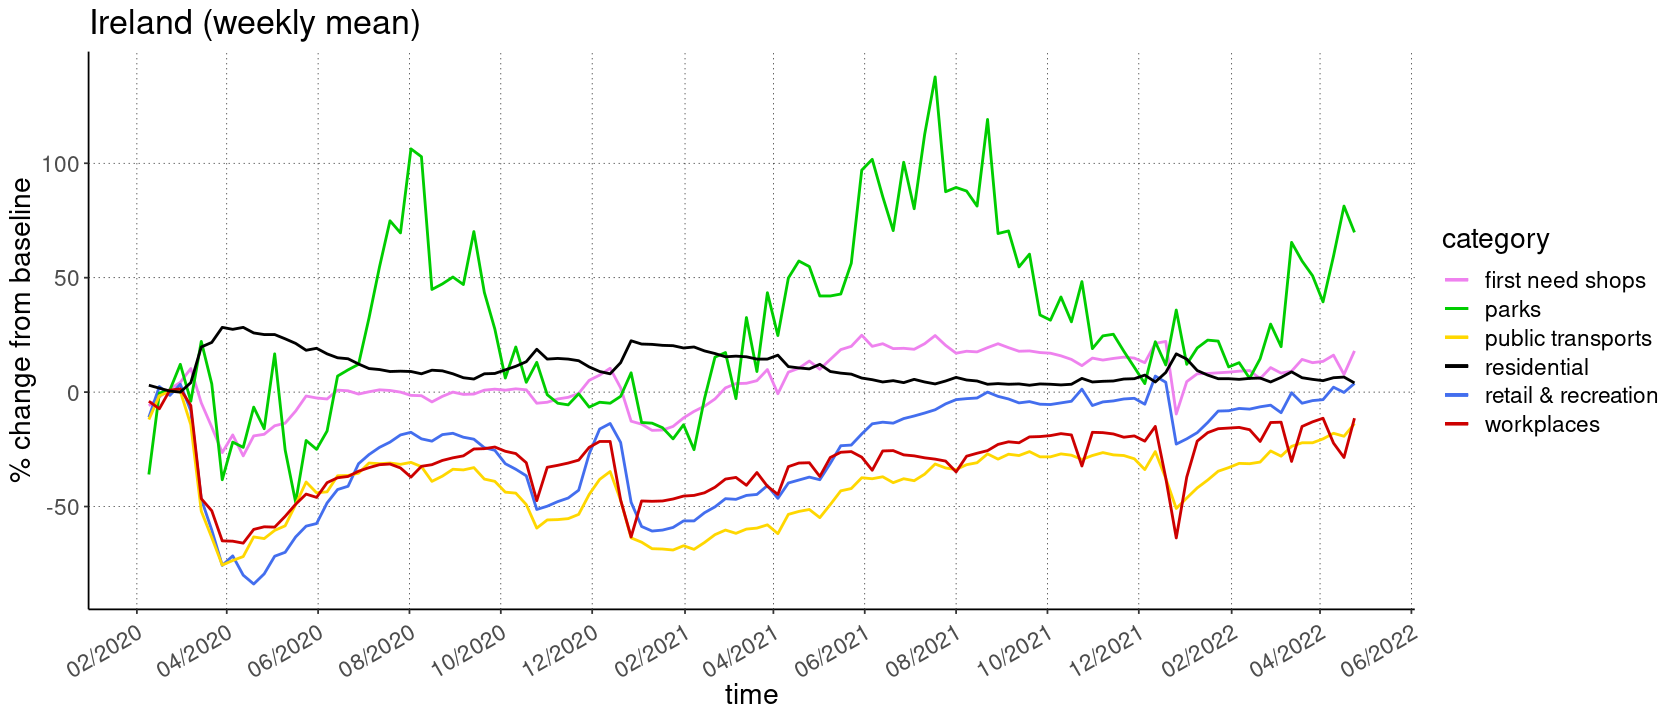

In [5]:
set_wid <- 14
set_hei <- 6

options(repr.plot.width=set_wid, repr.plot.height=set_hei)

ggplot(data=df_gie_weekly, aes(x=date)) +
        geom_line(aes(y = grocery_and_pharmacy_percent_change_from_baseline, colour = 'first need shops'), size=0.8) + 
        geom_line(aes(y = retail_and_recreation_percent_change_from_baseline, colour = 'retail & recreation'), size=0.8) +
        geom_line(aes(y = parks_percent_change_from_baseline, colour = 'parks'), size=0.8) +
        geom_line(aes(y = transit_stations_percent_change_from_baseline, colour = 'public transports'), size=0.8) +
        geom_line(aes(y = workplaces_percent_change_from_baseline, colour = 'workplaces'), size=0.8) +
        geom_line(aes(y = residential_percent_change_from_baseline, colour = 'residential'), size=0.8) +
        scale_color_manual(name = "category", values = c('violet','green3','gold','black','royalblue2','red3')) +
        ggtitle("Ireland (weekly mean)") +
        theme_classic()+
        labs(x = "time",y="% change from baseline") +
        scale_x_date(date_breaks = "2 month", date_labels ="%m/%Y") +
        theme(panel.grid.major = element_line(color = "black", size = 0.2, linetype = 3)) +
        theme(axis.text.x = element_text(angle = 30, vjust = 0.9, hjust=1)) +
        theme(text = element_text(size = 17))

In [6]:
df_fr_2020 <- read_csv('./data/Region_Mobility_unpacked/2020_FR_Region_Mobility_Report.csv')
df_fr_2021 <- read_csv('./data/Region_Mobility_unpacked/2021_FR_Region_Mobility_Report.csv')
df_fr_2022 <- read_csv('./data/Region_Mobility_unpacked/2022_FR_Region_Mobility_Report.csv')

Rows: 35299 Columns: 15
── Column specification ─────────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): country_region_code, country_region, sub_region_1, sub_region_2, i...
dbl  (6): retail_and_recreation_percent_change_from_baseline, grocery_and_ph...
lgl  (2): metro_area, census_fips_code
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 40150 Columns: 15
── Column specification ─────────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): country_region_code, country_region, sub_region_1, sub_region_2, i...
dbl  (6): retail_and_recreation_percent_change_from_baseline, grocery_and_ph...
lgl  (2): metro_area, census_fips_code
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 12980 

In [7]:
# selecting FR (no sub region)
df_gfr_2020 <- df_fr_2020 %>% dplyr::filter(is.na(sub_region_1))
df_gfr_2021 <- df_fr_2021 %>% dplyr::filter(is.na(sub_region_1))
df_gfr_2022 <- df_fr_2022 %>% dplyr::filter(is.na(sub_region_1))

# join all years in one single dataframe
df_gfr <- bind_rows(list(tibble1=df_gfr_2020, tibble2=df_gfr_2021, tibble3=df_gfr_2022))

In [8]:
df_gfr_monthly <- df_gfr %>% mutate(date = lubridate::round_date(df_gfr$date, "month"));
df_gfr_monthly <- aggregate( cbind(retail_and_recreation_percent_change_from_baseline,
                                  grocery_and_pharmacy_percent_change_from_baseline,
                                  parks_percent_change_from_baseline,
                                  transit_stations_percent_change_from_baseline,
                                  workplaces_percent_change_from_baseline,
                                  residential_percent_change_from_baseline) ~ date, df_gfr_monthly, mean )

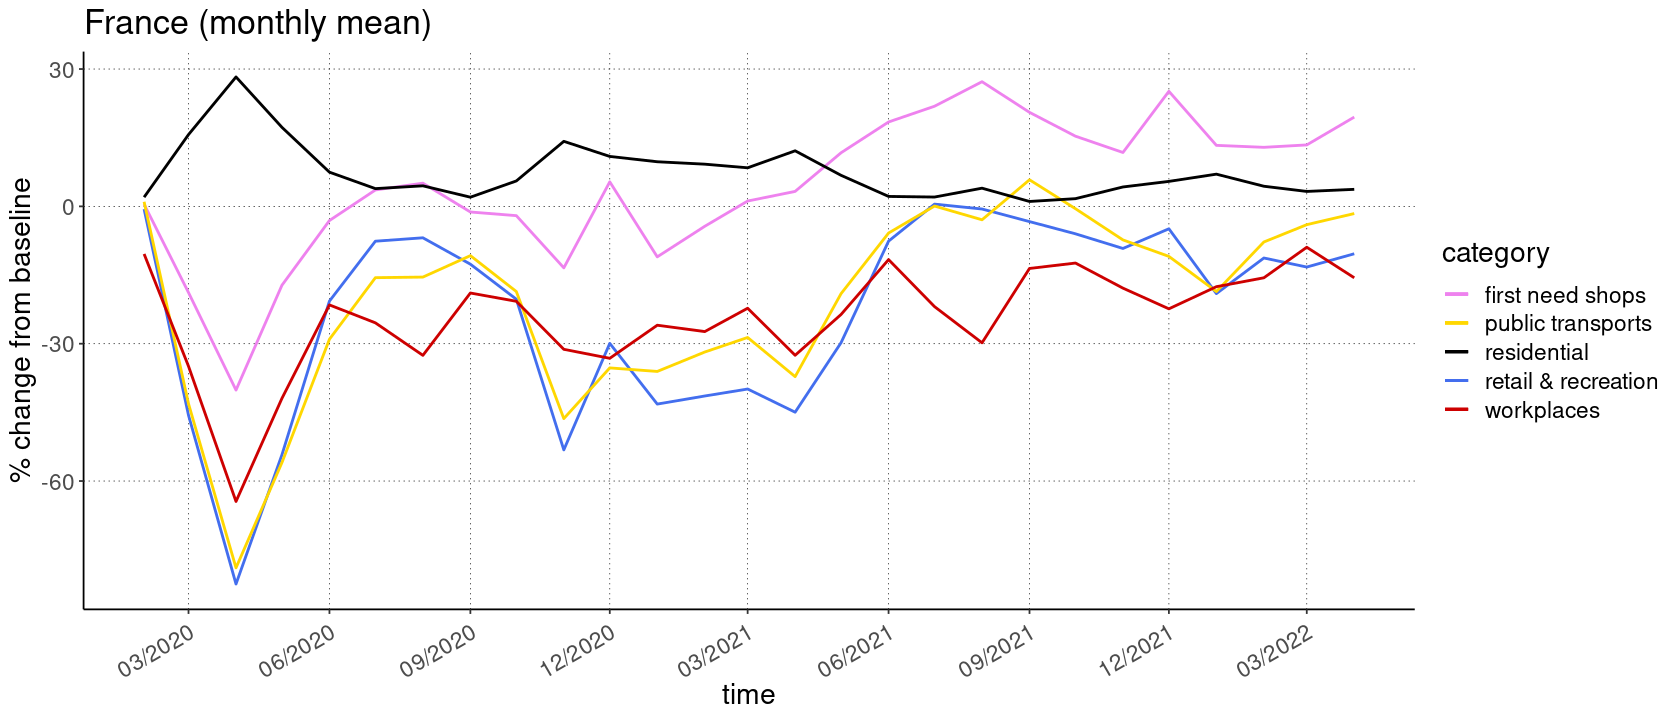

In [9]:
ggplot(data=df_gfr_monthly, aes(x=date)) +
        geom_line(aes(y = grocery_and_pharmacy_percent_change_from_baseline, colour = 'first need shops'), size=0.8) + 
        geom_line(aes(y = retail_and_recreation_percent_change_from_baseline, colour = 'retail & recreation'), size=0.8) +
        #geom_line(aes(y = parks_percent_change_from_baseline, colour = 'parks'), size=0.8) +
        geom_line(aes(y = transit_stations_percent_change_from_baseline, colour = 'public transports'), size=0.8) +
        geom_line(aes(y = workplaces_percent_change_from_baseline, colour = 'workplaces'), size=0.8) +
        geom_line(aes(y = residential_percent_change_from_baseline, colour = 'residential'), size=0.8) +
        scale_color_manual(name = "category", values = c('violet','gold','black','royalblue2','red3')) +
        ggtitle("France (monthly mean)") +
        theme_classic() +
        labs(x = "time",y="% change from baseline") +
        scale_x_date(date_breaks = "3 month", date_labels ="%m/%Y") +
        theme(panel.grid.major = element_line(color = "black", size = 0.2, linetype = 3)) +
        theme(axis.text.x = element_text(angle = 30, vjust = 0.9, hjust=1)) +
        theme(text = element_text(size = 17))

#### A small comment on the plots

Retail, recreation and workplace mobility are generally the most affected by the Covid pandemic. Spikes in those trends are very likely to be caused by increased restriction policies by the governments. **We could** give a better portrait of the situation if we could correlate the mobility to the actual pandemic situation. To do so, we need to complement this data with the pandemic data (number of positives, contagion trend, ...), like the ones from [WHO](covid19.who.int/).

There is also a clear periodic spike in the parks trend, during summer.

It is also possible to spot a **little detail about the workplace mobility**. We see that retail & recreation mobility have improved in the second half of 2021, symptom of some sort of recovery. Instead, workplace mobility seems to have a much slower pickup: indeed, it never matches again the pre-pandemic values (at least, in both Eire and France). This hints that **the pandemic might have changed the work habit** (smart working), or that the workplaces are generally more regulated.

In [10]:
df_it_2020 <- read_csv('./data/Region_Mobility_unpacked/2020_IT_Region_Mobility_Report.csv')
df_it_2021 <- read_csv('./data/Region_Mobility_unpacked/2021_IT_Region_Mobility_Report.csv')
df_it_2022 <- read_csv('./data/Region_Mobility_unpacked/2022_IT_Region_Mobility_Report.csv')

Rows: 40764 Columns: 15
── Column specification ─────────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): country_region_code, country_region, sub_region_1, sub_region_2, i...
dbl  (6): retail_and_recreation_percent_change_from_baseline, grocery_and_ph...
lgl  (2): metro_area, census_fips_code
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 46355 Columns: 15
── Column specification ─────────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): country_region_code, country_region, sub_region_1, sub_region_2, i...
dbl  (6): retail_and_recreation_percent_change_from_baseline, grocery_and_ph...
lgl  (2): metro_area, census_fips_code
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 14986 

In [11]:
# selecting IT (no sub region)
df_git_2020 <- df_it_2020 %>% dplyr::filter(is.na(sub_region_1))
df_git_2021 <- df_it_2021 %>% dplyr::filter(is.na(sub_region_1))
df_git_2022 <- df_it_2022 %>% dplyr::filter(is.na(sub_region_1))
df_git <- bind_rows(list(tibble1=df_git_2020, tibble2=df_git_2021, tibble3=df_git_2022))
df_git$iso_3166_2_code <- 'ITA'

# selecting Caltanissetta (my province)
df_gcl_2020 <- df_it_2020 %>% dplyr::filter(iso_3166_2_code == 'IT-CL')
df_gcl_2021 <- df_it_2021 %>% dplyr::filter(iso_3166_2_code == 'IT-CL')
df_gcl_2022 <- df_it_2022 %>% dplyr::filter(iso_3166_2_code == 'IT-CL')
df_gcl <- bind_rows(list(tibble1=df_gcl_2020, tibble2=df_gcl_2021, tibble3=df_gcl_2022))

df_merged <- bind_rows(df_git, df_gcl)

df_merged <- df_merged %>% mutate(date = lubridate::round_date(df_merged$date, "week"));
df_merged <- aggregate( cbind(retail_and_recreation_percent_change_from_baseline,
                                  grocery_and_pharmacy_percent_change_from_baseline,
                                  parks_percent_change_from_baseline,
                                  transit_stations_percent_change_from_baseline,
                                  workplaces_percent_change_from_baseline,
                                  residential_percent_change_from_baseline) ~ date + iso_3166_2_code, df_merged, mean )

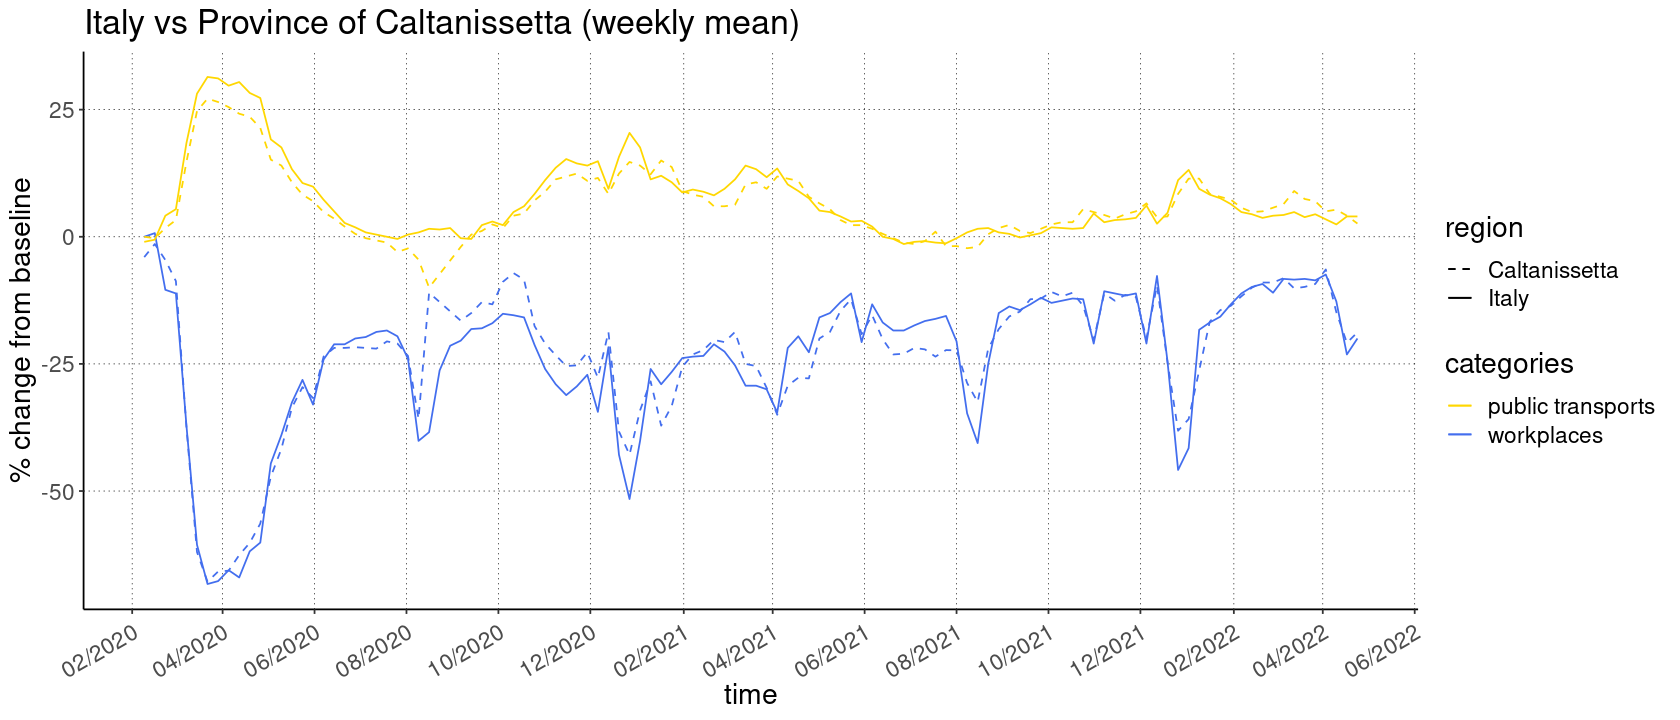

In [12]:
ggplot(data=df_merged, aes(x=date)) +
        geom_line(aes(y = workplaces_percent_change_from_baseline, color='workplaces', linetype = iso_3166_2_code)) +
        geom_line(aes(y = residential_percent_change_from_baseline, color='public transports', linetype = iso_3166_2_code)) +
        scale_color_manual(name = "categories", values = c('gold','royalblue2')) +
        scale_linetype_manual(name = "region",values = c("dashed", "solid"), labels=c('Caltanissetta','Italy')) +
        ggtitle("Italy vs Province of Caltanissetta (weekly mean)") +
        theme_classic() +
        labs(x = "time",y="% change from baseline") +
        scale_x_date(date_breaks = "2 month", date_labels ="%m/%Y") +
        theme(panel.grid.major = element_line(color = "black", size = 0.2, linetype = 3)) +
        theme(axis.text.x = element_text(angle = 30, vjust = 0.9, hjust=1)) +
        theme(text = element_text(size = 17))

My small province mobility overall reflects the national trend. I would not have taken it for granted, since we are more libertine.

<a id='exr2'></a>

## **EXR02** - von Neumann algorithm

I implement a function `set_seed()` to initialize the random number generator. This function automatically sets the appropriate number of digits for the input seed. I recommend to use seeds with a large number of ciphers.

The number generator can then be called using `newrand()`.

Instead of using the two functions suggested in the exercise, I use the one-liner instruction `as.numeric( substr(number, sx, dx))`.

In [13]:
set_seed <- function(newseed) {
    
    # setting the leading digits offset, once for all
    ndigits <- nchar(as.character(newseed))
    squareseed.len <- nchar(as.character(newseed^2))
    sx.offset <- floor( (squareseed.len-ndigits)/2 ) + 1
    
    # setting the global variables for the rand generator
    myrand.previous <<- newseed
    myrand.offset.sx <<- sx.offset
    myrand.offset.dx <<- sx.offset + ndigits - 1
    myrand.ndigits <<- ndigits
    return(ndigits) # returns the number of digits
}

newrand <- function() {
    myrand.previous <<- as.numeric( substr(myrand.previous^2, myrand.offset.sx, myrand.offset.dx) )
    return(myrand.previous)
}

In [14]:
set_seed(5772156649); # this is the seed from the example in lecture 4bis

[1] 10

In [15]:
newrand()
newrand()
newrand()

[1] 7923805949

[1] 7007174077

[1] 4885453808

In [16]:
set_seed(123456); # automatically sets 6 digits

[1] 6

In [17]:
newrand()

[1] 241383

<a id='exr3'></a>
## **EXR03** - Bayesian inference (journal)

In [18]:
# survey results
x <- 29  # people that have read the journal
n <- 150  # total of interviewed people

**a |** What kind of distribution would you assume for $y$, the number of people that have seen the last issue of the journal?

Since the survey has only two possible outcomes (journal has been seen or not seen), it is a Bernoulli process. 
Therefore I assume a binomial distribution for $x = 29$ successes over $n=150$ trials.

$$\mathcal{P}(y|x,n,M) = \binom{n}{x}\;x^y(1-y)^{n-x}$$

**b |** Assuming a uniform prior, what is the posterior distribution for $y$?

Since Bayes theorem states that $$\textrm{posterior} \;\propto\; \textrm{likelihood}\cdot \textrm{prior} \;,$$ a uniform prior (a constant) implies that the posterior is a binomial distribution as well.

**c |** Plot both posterior and likelihood distributions functions

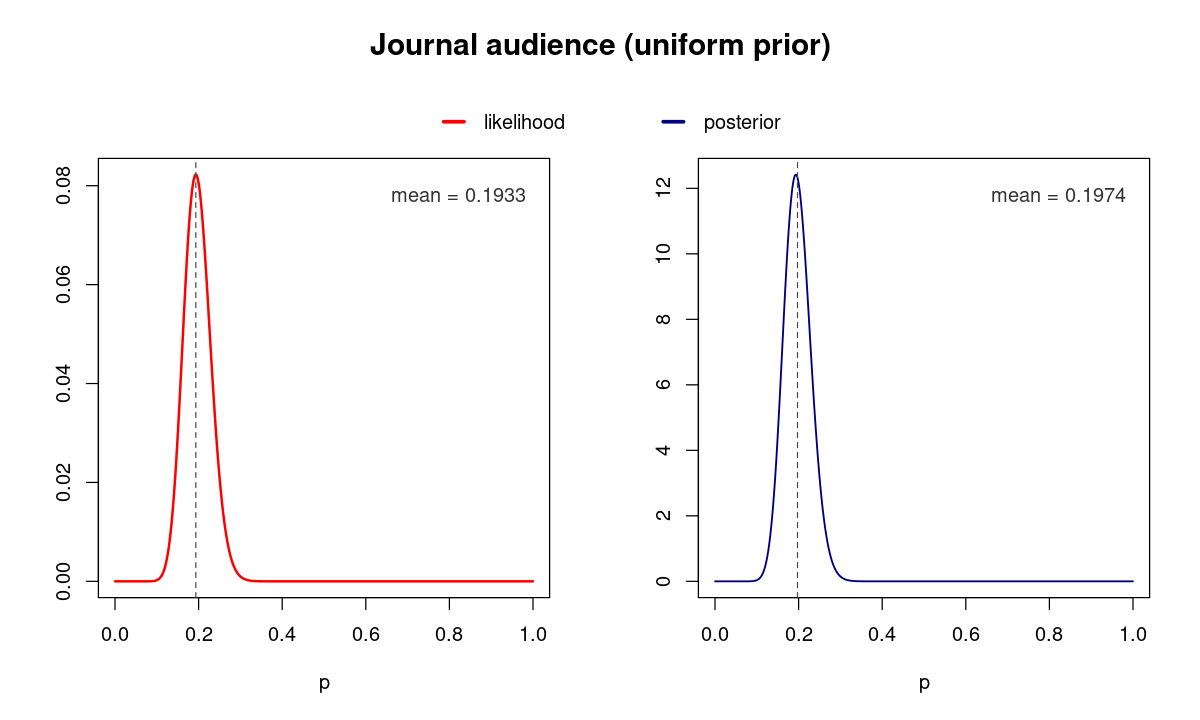

In [19]:
# setup plot env
old_par <- par()
par( mfrow=c(1, 2), oma=c(0, 0, 2.5, 0) )
options(repr.plot.width=10, repr.plot.height=6)
mean.precision <- 4  # precision of mean in plot

# generate a vector of probabilities uniform in [0,1]
dp <- 0.0005;    p <- seq(dp/2, 1, dp);


### likelihood (binomial distribution) ###
p.like <- dbinom(x, n, p)
#p.like <- p.like/(dp*sum(p.like))  # normalize the likelihood
p.like.mean <- x/n

plot(p, p.like, type="l", lwd=2, col="red", ylab="")
abline(v=p.like.mean, col="grey30", lty=2)
mtext(paste("mean =", round(p.like.mean,mean.precision), '   '), 
      3, adj=1, line=-2, col = "grey20")


### posterior with Uniform prior ###
post.unif <- dbinom(x=x, size=n, prob=p)
post.unif.norm <- post.unif/(dp*sum(post.unif))
post.unif.mean <- dp*sum(p*post.unif.norm)

plot(p, post.unif.norm, type="l", lwd=1.5, col='navy', ylab="")
abline(v=post.unif.mean, col="grey30", lty=2)
mtext(paste("mean =", round(post.unif.mean,mean.precision), '   '), 
      3, adj=1, line=-2, col = "grey20")

mtext('Journal audience (uniform prior)', outer = TRUE, cex = 1.5, font=2)
par(fig = c(0, 1, 0, 1), oma = c(0, 0, 0, 0), mar = c(0, 0, 0, 0), new = TRUE)

legend('top',legend = c("likelihood", "posterior"), col = c("red","navy"), 
       lwd = 3, xpd = TRUE, horiz = TRUE, cex = 1, seg.len=1, bty = 'n')

<a id='exr4'></a>
## **EXR04** - Bayesian inference (coin)

In [20]:
# coin flip outcomes
H <- TRUE;  T <- FALSE;
outcomes <- c(T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H)
#  I'm lazy, so I use this trick to encode the string I copied from
# the exercise's pdf using TRUE for Heads, FALSE for Tails.

x <- sum(outcomes)    # number of heads
n <- length(outcomes) # total coin flips

**a |** Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.

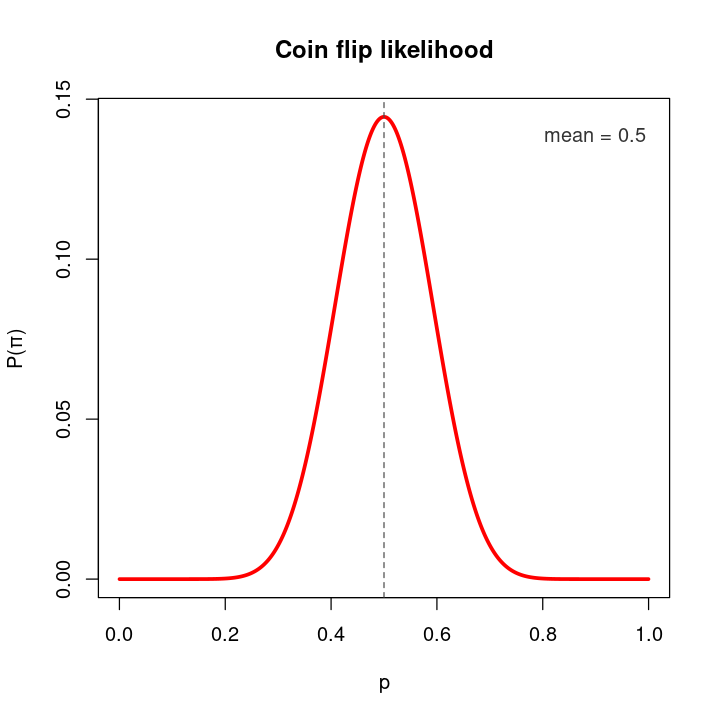

In [21]:
par <- old_par
options(repr.plot.width=6, repr.plot.height=6)

# generate a vector of probabilities uniform in [0,1]
dp <- 0.0005;    p <- seq(dp/2, 1, dp);

### likelihood (binomial distribution) ###
p.like <- dbinom(x, n, p)
p.like.mean <- x/n

plot(p, p.like, type="l", lwd=3, col="red",
     ylab="P(π)", main='Coin flip likelihood')
abline(v=p.like.mean, col="grey30", lty=2)
mtext(paste("mean =", round(p.like.mean,2), '   '), 
      3, adj=1, line=-2, col = "grey20")

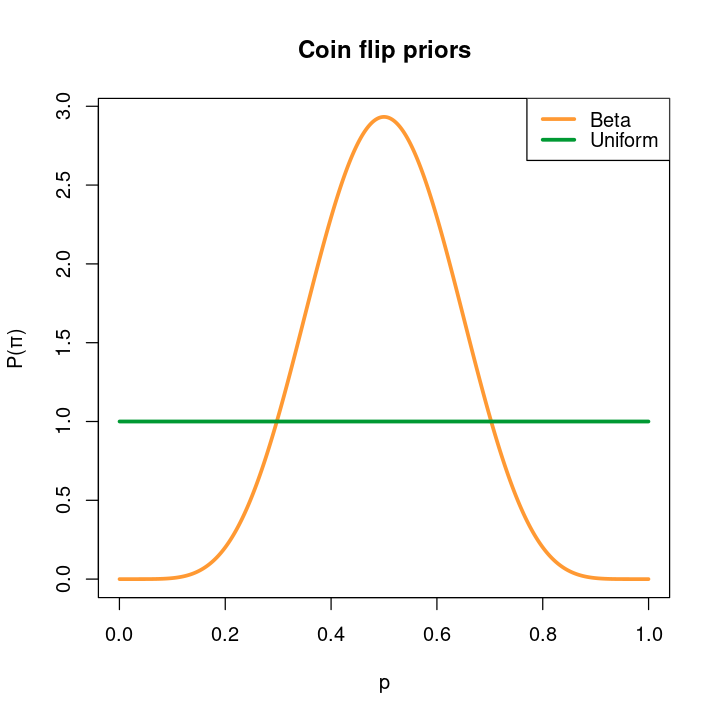

In [22]:
### prior: uniform & beta ###
prior.unif <- dunif(x=p)

#  alpha=beta if the coin is fair,
# then I choose 'by heart' alpha = 7
alpha <- 7;  beta <- alpha;  
prior.beta <- dbeta(x=p, alpha, beta)

plot(p, prior.beta, type="l", lwd=3, col="#FF9933",
     ylab="P(π)", main='Coin flip priors')
lines(p, prior.unif, type="l", lwd=3, col="#009933")

legend('topright', legend = c("Beta","Uniform  "), 
       col = c("#FF9933","#009933"), lty=c(1,1), lwd = 3)

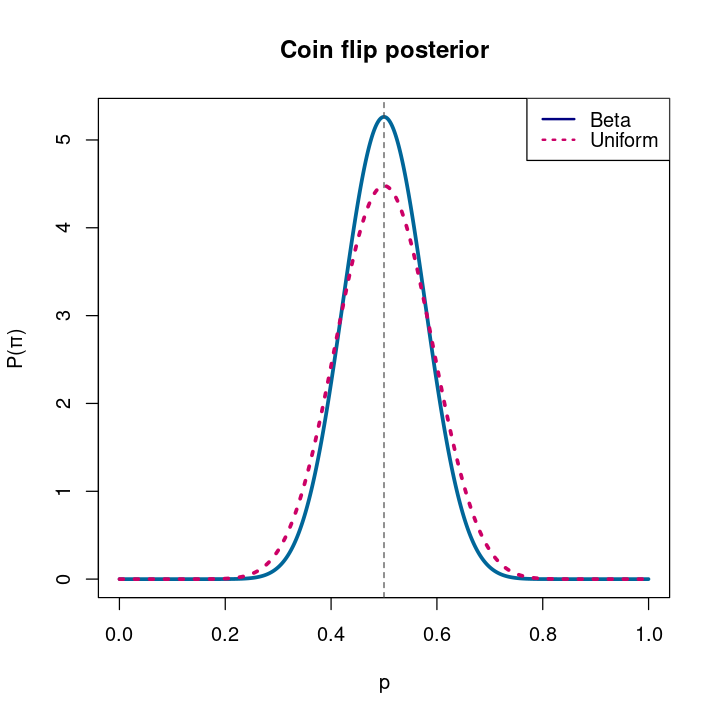

In [23]:
### posterior with Beta prior ###
post.beta <- dbeta(x=p, alpha+x,beta+n-x)
post.beta.mean <- #dp*sum(p*post.beta)

plot(p, post.beta, type="l", lwd=3, col='#006699', 
     ylab="P(π)", main='Coin flip posterior')
abline(v=post.beta.mean, col="grey30", lty=2)


### posterior with Uniform prior ###
post.unif <- dbinom(x=x, size=n, prob=p)
post.unif.norm <- post.unif/(dp*sum(post.unif))
post.unif.mean <- x/n

lines(p, post.unif.norm, type="l", 
      lwd=3, lty=3, col='#CC0066')
abline(v=post.unif.mean, col="grey30", lty=2)

legend('topright', legend = c("Beta","Uniform  "), 
       col = c("navy","#CC0066"), lty=c(1,3), lwd = 2)

**b |** Evaluate the most probable value for the coin probability $p$ and, integrating the posterior probability distribution, give an estimate for a $95\%$ credibility interval.

In [24]:
# This function manually integrates the posterior determine and draw the posterior distribution for μ, given the data
# to get the margins for 95% confidence.
evaluate95 <- function(distrib, p, dp) {
    integral <- 0.0;  i <- 0;
    while(integral < 0.025) {
        i <- i+1
        integral <- integral + dp*distrib[i]
    }
    margin.sx <- p[i]
    
    while(integral < 0.975) {
        i <- i+1
        integral <- integral + dp*distrib[i]
    }
    margin.dx <- p[i]
    
    return( c(margin.sx, margin.dx) )
}

In [25]:
# the most probable value is the mean
cat(' Beta (fair) prior --> p =', post.beta.mean,
    ', 95% confidence in [', evaluate95(post.beta, p, dp), ']\n')

cat(' Unif prior --> p =', post.unif.mean,
    ', 95% confidence in [', evaluate95(post.unif.norm, p, dp), ']\n')

 Beta (fair) prior --> p = , 95% confidence in [ 0.35475 0.64525 ]
 Unif prior --> p = 0.5 , 95% confidence in [ 0.33075 0.66925 ]


**c |** Repeat the same analysis assuming a sequential analysis of the data. Show how the most
probable value and the credibility interval change as a function of the number of coin
tosses (i.e. from 1 to 30).

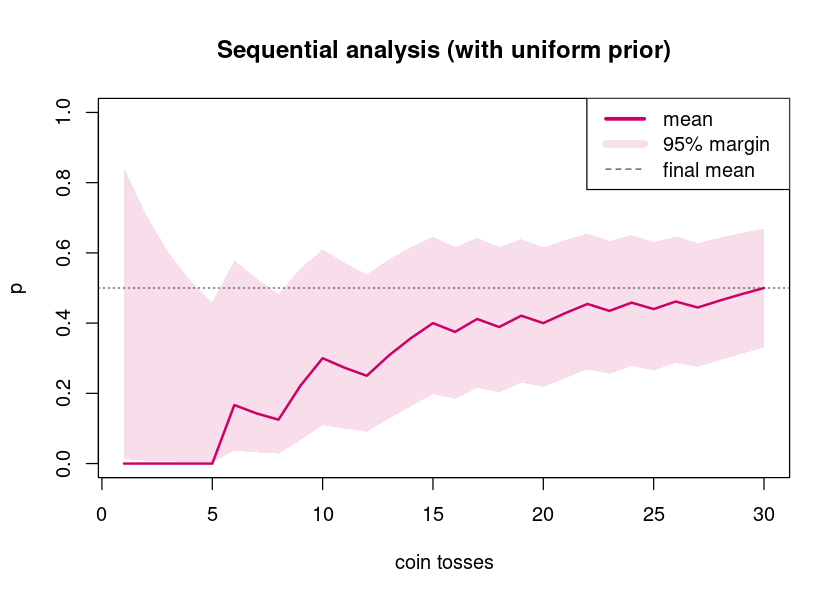

In [26]:
options(repr.plot.width=7, repr.plot.height=5)

means <- vector(length = n)
margin.low <- vector(length = n)
margin.up <- vector(length = n)

for(np in 1:n) {
    # selecting np coin tosses
    r <- sum(outcomes[1:np])
    
    posterior <- dbinom(x=r, size=np, prob=p)
    posterior.norm <- posterior/(dp*sum(posterior))
    means[np] <- r/np #dp*sum(p*posterior.norm)
    
    margins <- evaluate95(posterior.norm, p, dp)
    margin.low[np] <- margins[1]
    margin.up[np] <- margins[2]
}


plot(1:n, means, type="l", lwd=2, col='#CC0066',
    xlab='coin tosses', ylab='p', ylim=c(0,1),
    main = 'Sequential analysis (with uniform prior)')
polygon( c(1:n, n:1), c(margin.low,rev(margin.up)), col='#CC006622', border = NA)
abline(h=post.unif.mean, col="grey30", lty=3)

legend('topright', legend = c("mean","95% margin", "final mean"),
       col = c("#CC0066","#CC006622", 'grey30'), lty=c(1,1,2), lwd = c(3,6,1), y.intersp=1.6)

Just for curiosity, let us see **how the posterior distribution evolves** in a sequential analysis with a step of 5 tosses.

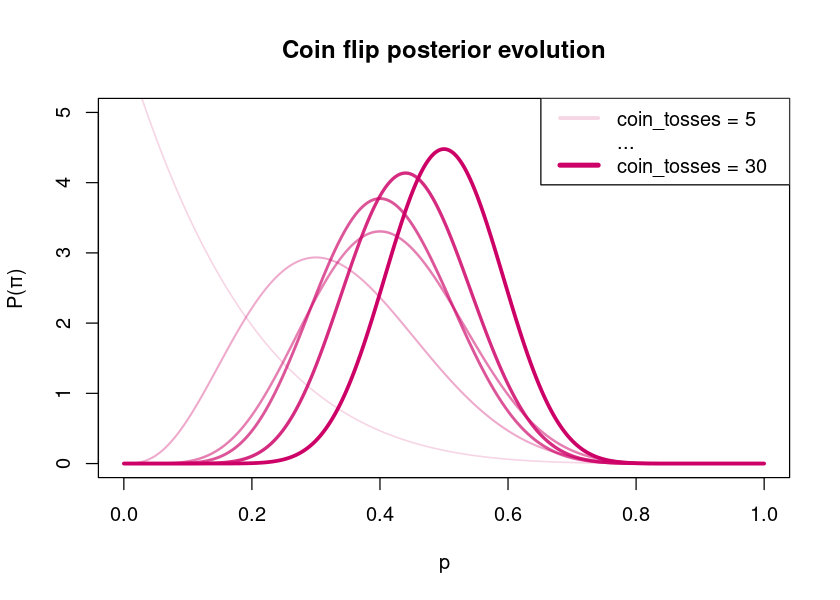

In [27]:
plot_first <- TRUE
for(np in seq(5,n,5) ) {
    # selecting np coin tosses
    r <- sum(outcomes[1:np])
    
    posterior <- dbinom(x=r, size=np, prob=p)
    posterior.norm <- posterior/(dp*sum(posterior))
    
    if(plot_first) {
        plot(p, posterior.norm, type="l", lwd=1+2*np/n, col=alpha('#CC0066', np/n), 
             ylab="P(π)", main='Coin flip posterior evolution', ylim=c(0,5))
        plot_first <- FALSE
    }
    else
        lines(p, posterior.norm, type="l", lwd=1+2*np/n, col=alpha('#CC0066', np/n))
}

legend('topright', legend = c("coin_tosses = 5","...","coin_tosses = 30"),
       col = c(alpha('#CC0066', 5/n),'black',"#CC0066"), lty=c(1,1,1), lwd = c(3,0,4), y.intersp=1.5)

**d |** Do you get a different result, by analyzing the data sequentially with respect to a one-step
analysis (i.e. considering all the data as a whole)?

If we look at the data sequentially, the trend of the most probable value $p$ is fluctuating. Of course, the result for $\text{coin_tosses} = 30$ matches with the value computed using the whole dataset ($p_{final}=0.5$, see point *b*).

We can also see that most of the time, the $95\%$ confidence interval includes the final value of the analysis. This behaviour is indicative of the fact that with few data the probability margin is bigger, and the accuracy of the final probability improves with larger number of samples.

Just for curiosity, I will perform again the sequential analysis using the **beta prior**.

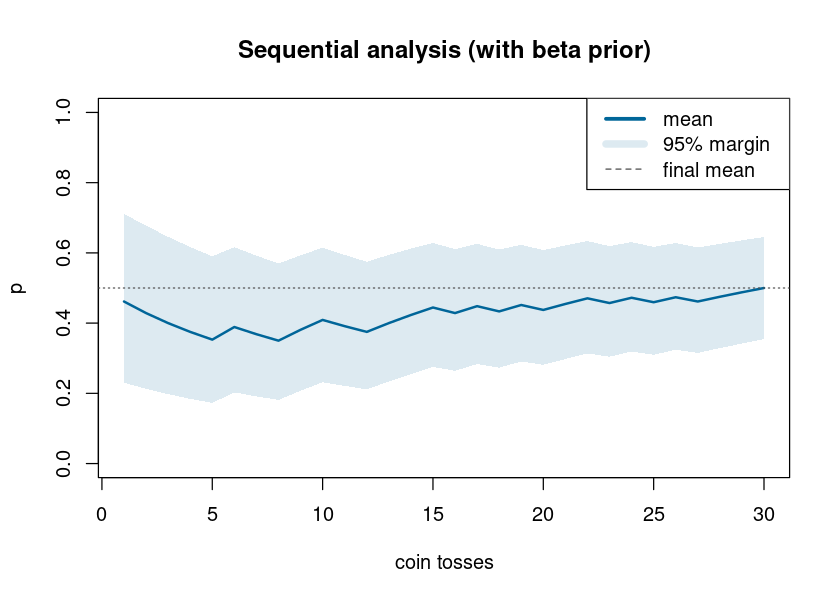

In [28]:
options(repr.plot.width=7, repr.plot.height=5)

means <- vector(length = n)
margin.low <- vector(length = n)
margin.up <- vector(length = n)

for(np in 1:n) {
    # selecting np coin tosses
    r <- sum(outcomes[1:np])
    
    posterior <- dbeta(x=p, alpha+r,beta+np-r)
    means[np] <- (r+alpha-1)/(np+alpha+beta-2) # dp*sum(p*posterior)# 
    
    margins <- evaluate95(posterior, p, dp)
    margin.low[np] <- margins[1]
    margin.up[np] <- margins[2]
}


plot(1:n, means, type="l", lwd=2, col='#006699',
    xlab='coin tosses', ylab='p', ylim=c(0,1),
    main = 'Sequential analysis (with beta prior)')
polygon( c(1:n, n:1), c(margin.low,rev(margin.up)), col='#00669922', border = NA)
abline(h=post.unif.mean, col="grey30", lty=3)

legend('topright', legend = c("mean","95% margin", "final mean"),
       col = c("#006699","#00669922", 'grey30'), lty=c(1,1,2), lwd = c(3,6,1), y.intersp=1.6)

**Comment**: The result is similar to the sequential analysis with the Uniform prior, but the mean is closer to $p=0.5$, whereas the confidence interval is narrower. This is not surprising, since we have prompted a prior which supposes a fair coin!

***
**extra |** Just for curiosity, what if we use an **asymmetric prior**? Example: we expect the coin to be not fair.

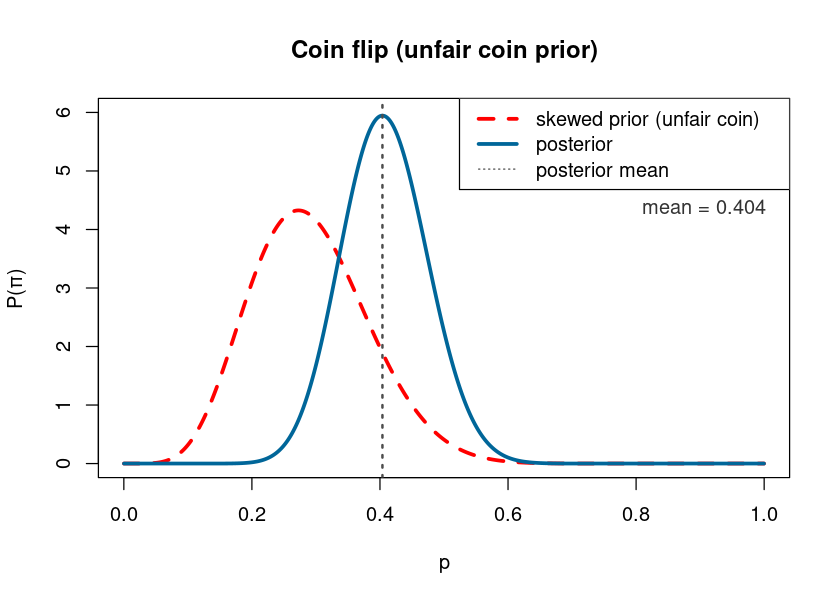

In [29]:
### skewed Beta prior ###
alpha <- 7;  beta <- 17;

prior.beta <- dbeta(x=p, alpha, beta)
post.beta <- dbeta(x=p, alpha+x,beta+n-x)
post.beta.mean <- (r+alpha-1)/(np+alpha+beta-2) #dp*sum(p*post.beta)

plot(p, prior.beta, type="l", lwd=3, col="red", lty=2, ylim=c(0,6),
     ylab="P(π)", main='Coin flip (unfair coin prior)')
lines(p, post.beta, type="l", lwd=3, col='#006699')

abline(v=post.beta.mean, col="grey30", lty=3, lwd=2)

#abline(v=0.5, col="red", lty=3)  # 0.5 line

mtext(paste("mean =", round(post.beta.mean,3), '   '), 
      3, adj=1, line=-5, col = "grey20")

legend('topright', legend = c("skewed prior (unfair coin)", "posterior", "posterior mean"),
       col = c("red","#006699","grey30"), lty=c(2,1,3), lwd = c(3,3,1), y.intersp=1.6)

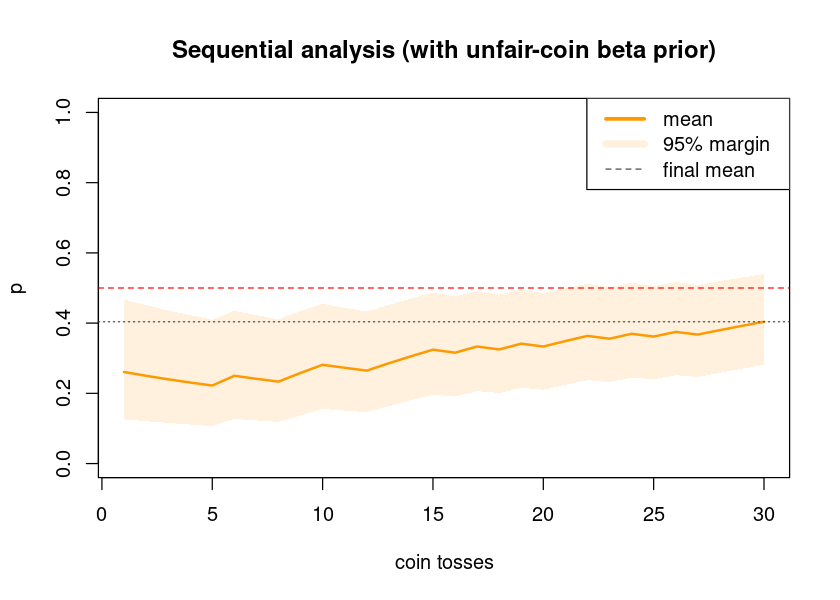

In [30]:
options(repr.plot.width=7, repr.plot.height=5)

means <- vector(length = n)
margin.low <- vector(length = n)
margin.up <- vector(length = n)

for(np in 1:n) {
    # selecting np coin tosses
    r <- sum(outcomes[1:np])
    
    posterior <- dbeta(x=p, alpha+r,beta+np-r)
    means[np] <- (r+alpha-1)/(np+alpha+beta-2) #dp*sum(p*posterior)
    
    margins <- evaluate95(posterior, p, dp)
    margin.low[np] <- margins[1]
    margin.up[np] <- margins[2]
}

plot(1:n, means, type="l", lwd=2, col='#FF9900',
    xlab='coin tosses', ylab='p', ylim=c(0,1),
    main = 'Sequential analysis (with unfair-coin beta prior)')
polygon( c(1:n, n:1), c(margin.low,rev(margin.up)), col='#FF990022', border = NA)
abline(h=post.beta.mean, col="grey30", lty=3)

abline(h=0.5, col="red", lty=2)  # 0.5 line

legend('topright', legend = c("mean","95% margin", "final mean"),
       col = c("#FF9900","#FF990022", 'grey30'), lty=c(1,1,2), lwd = c(3,6,1), y.intersp=1.6)

End of file.